In [99]:
import os
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [100]:
ross_df = pd.read_csv('train.csv')
store_df = pd.read_csv('store.csv')
test_df = pd.read_csv('test.csv')

C:\Users\Ayush Maurya\AppData\Local\Temp\ipykernel_8992\70155220.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('train.csv')


In [101]:
merged_df = ross_df.merge(store_df,how = 'left', on = 'Store')
merged_test_df = test_df.merge(store_df,how = 'left', on = 'Store')

In [102]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [103]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.month
    df['weekOfYear'] = df.Date.dt.isocalendar().week

In [104]:
split_date(merged_df)
split_date(merged_test_df)
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [105]:
merged_df[merged_df.Open == 0].Sales.value_counts()


Sales
0    172817
Name: count, dtype: int64

In [106]:
merged_df = merged_df[merged_df.Open == 1].copy()

for every day we are going to calculate new colummn wherre we can do calculatre from when competion is opened and conver it into month

In [107]:
def  com_month(df):
    df['CompetitionOpen'] = 12*(df.Year-df.CompetitionOpenSinceYear)+ (df.Month-df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x<0 else x).fillna(0)


In [108]:
com_month(merged_df)
com_month(merged_test_df)

In [109]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,7,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,7,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,7,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,7,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,7,31,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,2006.0,0,NaN,NaN,NaN,2013,1,1,1,76.0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,1999.0,0,NaN,NaN,NaN,2013,1,1,1,159.0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,0,NaN,NaN,NaN,2013,1,1,1,0.0


In [110]:
def check_promo_month(row):
    month2str = { 1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sept",
    10: "Oct",
    11: "Nov",
    12: "Dec"}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0
def promo_cols(df):
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.weekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']



In [111]:
promo_cols(merged_df)
promo_cols(merged_test_df)
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,weekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,7,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,7,31,92.0,64.131148,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,7,31,103.0,51.901639,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,7,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,7,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


In [112]:
input_cols = ['Store', 'DayOfWeek','Promo','StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
'CompetitionDistance','Year', 'Month', 'Day','Promo2','weekOfYear','CompetitionOpen', 'Promo2Open','IsPromo2Month']
target_cols = 'Sales'

In [113]:
inputs = merged_df[input_cols].copy()
targets= merged_df[target_cols].copy()

In [114]:
test_inputs = merged_test_df[input_cols].copy()

In [115]:
merged_df['DayOfWeek']

0          5
1          5
2          5
3          5
4          5
          ..
1016776    2
1016827    2
1016863    2
1017042    2
1017190    2
Name: DayOfWeek, Length: 844392, dtype: int64

In [116]:
numeric_cols = ['Store',
 'Promo',
 'SchoolHoliday',
 'CompetitionDistance',
 'Promo2',
 'Year',
 'Month',
 'Day',
 'weekOfYear',
 'CompetitionOpen',
 'Promo2Open',
 'IsPromo2Month']
categorical_cols = ['StateHoliday', 'StoreType', 'Assortment', 'DayOfWeek']

In [117]:
inputs[numeric_cols].isnull().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
Promo2                    0
Year                      0
Month                     0
Day                       0
weekOfYear                0
CompetitionOpen           0
Promo2Open                0
IsPromo2Month             0
dtype: int64

In [118]:
max_distance = inputs.CompetitionDistance.max()
max_distance

np.float64(75860.0)

In [119]:
# Replace NaN values with max_distance*2
inputs['CompetitionDistance'] = inputs['CompetitionDistance'].fillna(max_distance*2)
test_inputs['CompetitionDistance'] = test_inputs['CompetitionDistance'].fillna(max_distance*2)


In [120]:
inputs['CompetitionDistance'].isnull().sum()

np.int64(0)

In [121]:
from sklearn.preprocessing import MinMaxScaler

In [122]:
scaler  = MinMaxScaler().fit(inputs[numeric_cols])

In [123]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [124]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,Promo2,weekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,0.000000,5,1.0,0,1.0,c,a,0.008240,1.0,0.545455,0.545455,0.0,0.588235,0.059163,0.000000,0.0
1,0.000898,5,1.0,0,1.0,a,a,0.003626,1.0,0.545455,0.545455,1.0,0.588235,0.066378,0.890710,1.0
2,0.001795,5,1.0,0,1.0,a,a,0.093013,1.0,0.545455,0.545455,1.0,0.588235,0.074315,0.720856,1.0
3,0.002693,5,1.0,0,1.0,c,c,0.003955,1.0,0.545455,0.545455,0.0,0.588235,0.050505,0.000000,0.0
4,0.003591,5,1.0,0,1.0,a,a,0.197034,1.0,0.545455,0.545455,0.0,0.588235,0.002165,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,2,0.0,a,1.0,b,a,0.000857,0.0,0.000000,0.000000,0.0,0.000000,0.054834,0.000000,0.0
1016827,0.657092,2,0.0,a,1.0,b,b,0.005537,0.0,0.000000,0.000000,0.0,0.000000,0.114719,0.000000,0.0
1016863,0.689408,2,0.0,a,1.0,b,b,0.005405,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.016849,1.0
1017042,0.850090,2,0.0,a,1.0,b,b,0.009295,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [125]:
from sklearn.preprocessing import OneHotEncoder

In [126]:
# Ensure all categorical columns are strings
inputs[categorical_cols] = inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

# Handle missing values
inputs[categorical_cols] = inputs[categorical_cols].fillna("Missing")
test_inputs[categorical_cols] = test_inputs[categorical_cols].fillna("Missing")

# Fit and transform using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])


In [127]:
encoded_cols

['StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c',
 'DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7']

In [128]:
X = inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

GRADIENT BOOSTING

In [129]:
X

,Store,Promo,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,Day,weekOfYear,CompetitionOpen,...,Assortment_a,Assortment_b,Assortment_c,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,0.000000,1.0,1.0,0.008240,0.0,1.0,0.545455,0.545455,0.588235,0.059163,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000898,1.0,1.0,0.003626,1.0,1.0,0.545455,0.545455,0.588235,0.066378,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.001795,1.0,1.0,0.093013,1.0,1.0,0.545455,0.545455,0.588235,0.074315,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.002693,1.0,1.0,0.003955,0.0,1.0,0.545455,0.545455,0.588235,0.050505,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.003591,1.0,1.0,0.197034,0.0,1.0,0.545455,0.545455,0.588235,0.002165,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,0.611311,0.0,1.0,0.000857,0.0,0.0,0.000000,0.000000,0.000000,0.054834,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1016827,0.657092,0.0,1.0,0.005537,0.0,0.0,0.000000,0.000000,0.000000,0.114719,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1016863,0.689408,0.0,1.0,0.005405,1.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1017042,0.850090,0.0,1.0,0.009295,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [130]:
from xgboost import XGBRegressor

In [154]:
class MyXGBRegressor(XGBRegressor):
    def __sklearn_tags__(self):
        return super()._get_tags()
    
model = MyXGBRegressor(random_state=42, njobs=-1, n_estimators=20, max_depth=5)
print(model)


MyXGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=20, n_jobs=None, njobs=-1,
               num_parallel_tree=None, ...)


In [155]:
model.fit(X,targets)

c:\Users\Ayush Maurya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The MyXGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

MyXGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=5, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=20, n_jobs=None, njobs=-1,
               num_parallel_tree=None, ...)

In [156]:
targets

0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [157]:
preds = model.predict(X)

In [158]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(targets,preds)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")


RMSE: 2294.5396052367455


In [164]:
import matplotlib.pyplot as plt
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 30,30


In [167]:
trees = model.get_booster().get_dump()

In [168]:
print(trees[0])

0:[Promo<1] yes=1,no=2,missing=2
	1:[StoreType_b<1] yes=3,no=4,missing=4
		3:[Assortment_a<1] yes=7,no=8,missing=8
			7:[CompetitionDistance<0.0023071852] yes=15,no=16,missing=16
				15:[Promo2<1] yes=31,no=32,missing=32
					31:leaf=663.008179
					32:leaf=-121.868401
				16:[weekOfYear<0.921568632] yes=33,no=34,missing=34
					33:leaf=-294.487427
					34:leaf=202.643784
			8:[weekOfYear<0.921568632] yes=17,no=18,missing=18
				17:[Promo2Open<0.141165763] yes=35,no=36,missing=36
					35:leaf=-397.414978
					36:leaf=-593.636047
				18:[DayOfWeek_1<1] yes=37,no=38,missing=38
					37:leaf=-174.74942
					38:leaf=386.034027
		4:[CompetitionDistance<0.00791034941] yes=9,no=10,missing=10
			9:[CompetitionDistance<0.00593276182] yes=19,no=20,missing=20
				19:[CompetitionOpen<0.114718616] yes=39,no=40,missing=40
					39:leaf=442.590851
					40:leaf=2151.03418
				20:[DayOfWeek_7<1] yes=41,no=42,missing=42
					41:leaf=3033.40405
					42:leaf=5008.87109
			10:[DayOfWeek_7<1] yes=21,no=22,mis

FEATURE IMPORTANCE

In [169]:
importance_df = pd.DataFrame({'feature':X.columns,'importance':model.feature_importances_}).sort_values('importance',ascending=False)

In [171]:
importance_df.head(10)

,feature,importance
1,Promo,0.317188
23,DayOfWeek_1,0.099811
17,StoreType_b,0.075941
6,Month,0.058707
20,Assortment_a,0.049212
4,Promo2,0.042094
3,CompetitionDistance,0.039730
24,DayOfWeek_2,0.037669
19,StoreType_d,0.030869
0,Store,0.029185


<Axes: title={'center': 'Feature importance'}, xlabel='importance', ylabel='feature'>

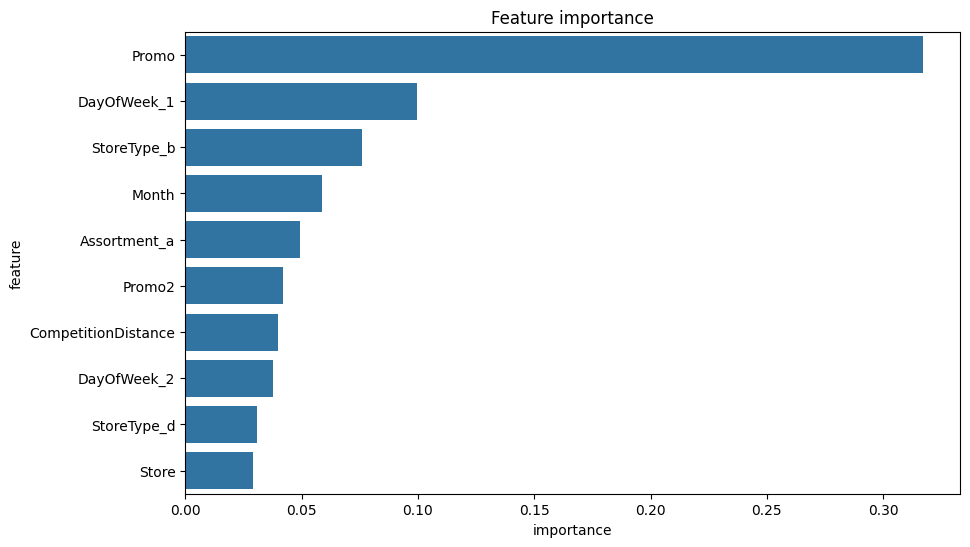

In [173]:
plt.figure(figsize=(10,6))
plt.title('Feature importance')
sns.barplot(data = importance_df.head(10), x = 'importance',y = 'feature')

K FOLD CROSS VALIDATION

In [196]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b)**0.5

In [197]:
from sklearn.model_selection import KFold

In [198]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [204]:
kfold = KFold(n_splits=5,shuffle=True)

In [205]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=5, 
                                                     n_estimators=50)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
    

Train RMSE: 1888.7186132402041, Validation RMSE: 1893.303198116984
Train RMSE: 1832.3892190252593, Validation RMSE: 1840.4341199836522
Train RMSE: 1830.3526982524434, Validation RMSE: 1834.539656153554
Train RMSE: 1862.2183008444526, Validation RMSE: 1864.1658322155783
Train RMSE: 1881.2934380367142, Validation RMSE: 1885.5310259977161


In [209]:
def test_params_kfold(n_splits,**params):
    train_rmes,val_rmes,models = [] ,[], []
    kfold = KFold(n_splits)
    for train_idxs,val_idxs in kfold.split(X):
        X_train,train_targets = X.iloc[train_idxs],targets.iloc[train_idxs]
        X_val,val_targets = X.iloc[train_idxs],targets.iloc[train_idxs]
        model,train_rmse,val_rmse = train_and_evaluate(X_train,train_targets,X_val,val_targets,**params)
        models.append(model)
        print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
    return models


it will take long rime so we just gonna do fucking split

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [222]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

In [223]:
test_params(n_estimators=10)

Train RMSE: 2364.736243220372, Validation RMSE: 2373.847720474083


In [224]:
test_params(n_estimators = 20)

Train RMSE: 2042.214973992699, Validation RMSE: 2046.625209949296


In [225]:
test_params(n_estimators = 100)

Train RMSE: 1187.8387937763273, Validation RMSE: 1192.4322307787559


In [226]:
test_params(n_estimators = 240)

Train RMSE: 917.371755342402, Validation RMSE: 929.1441962903282


max depth

In [229]:
test_params(max_depth = 5,n_estimators = 10)

Train RMSE: 2464.1914495428314, Validation RMSE: 2475.2843271026463


In [227]:
test_params(max_depth = 5,n_estimators = 100)

Train RMSE: 1425.5786982836128, Validation RMSE: 1428.242451406623


In [228]:
test_params(max_depth = 10,n_estimators = 100)

Train RMSE: 679.766044312306, Validation RMSE: 772.7337025133561


learning rate

In [ ]:
test_params(n_estimators = 100,learning_rate = 0.01)

Train RMSE: 2791.0485484849596, Validation RMSE: 2804.8257521635815


In [231]:
test_params(n_estimators = 100,learning_rate = 0.11)

Train RMSE: 1770.6837662326946, Validation RMSE: 1772.6867320539181


In [232]:
test_params(n_estimators = 100,learning_rate = 0.50)

Train RMSE: 1024.930607407155, Validation RMSE: 1028.373412238959


In [234]:
test_params(n_estimators = 100,learning_rate = 0.9)

Train RMSE: 956.413515431479, Validation RMSE: 968.0785414934059


In [238]:
test_params(n_estimators = 240,learning_rate = 0.9)

Train RMSE: 792.896194340722, Validation RMSE: 828.2214000495278


In [236]:
test_params(n_estimators = 500,learning_rate = 0.01,max_depth = 10)

Train RMSE: 1545.1374534325416, Validation RMSE: 1572.8997107253851


Booster : - where linear regression model calculate residuals

In [239]:
test_params(booster = 'gblinear')

Train RMSE: 2726.2470541020307, Validation RMSE: 2737.0233831664646


In [240]:
test_params(n_estimators = 1000,learning_rate = 0.5,max_depth = 10,subsample = 0.9,colsample_bytree = 0.7)

Train RMSE: 313.1662023790243, Validation RMSE: 726.7831949763286
